In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from time import sleep 
import scrapy
import random
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
from pandas import ExcelWriter
import xlsxwriter
import openpyxl
from openpyxl import workbook

In [5]:
import pandas as pd
import os 
import re
from wordcloud import WordCloud

# Leemos los datos
papers = pd.read_excel('DatosInvestigacion-CargaCompleta.xlsx')
# Imprimimos los datos
papers.head()

,ID,TITULO,MES,AÑO,AUTORES,REVISTA,CITACIONES,REFERENCIAS
0,1,Security modelling and assessment of modern ne...,Dec15,2019,"Enoch, SY; Hong, JB and Kim, DS",JOURNAL OF NETWORK AND COMPUTER APPLICATIONS,5,52
1,2,Formalization of security patterns as a means ...,Feb,2015,"Varela-Vaca, AJ and Gasca, RM",LOGIC JOURNAL OF THE IGPL,5,32
2,3,Catalytic Decomposition of N2O over Co-Ti Oxid...,Jun21,2016,"Zhang, C; Zhang, ZP; (...); Zhu, YJ",CHEMCATCHEM,26,56
3,4,Security of electronic personal health informa...,Mar4,2022,"Chuma, KG and Ngoepe, M",INFORMATION SECURITY JOURNAL,1,59
4,5,Reversible Fluorescence Switching of Metal-Org...,Apr24,2020,"Venkateswarlu, S; Reddy, AS; (...); Yoon, MY",ACS APPLIED NANO MATERIALS,23,41


In [6]:
# Eliminamos las columnas
papers = papers.drop(columns=['ID', 'MES', 'AÑO', 'AUTORES', 'CITACIONES', 'REFERENCIAS'], axis=1).sample(100)
# Imprimimos
papers.head()

,TITULO,REVISTA
364,Application of trace element and stable isotop...,FOOD CHEMISTRY
694,"Oxytetracycline, copper, and zinc effects on n...",FOOD AND ENERGY SECURITY
617,A Two-Stage MCDM Model for Exploring the Influ...,INTERNATIONAL JOURNAL OF ENVIRONMENTAL RESEARC...
496,Laser Writing of Bright Colors on Near-Percola...,ACS NANO
123,"Proton-induced reactions on Fe, Cu, and Ti fro...",EUROPEAN PHYSICAL JOURNAL A


In [7]:
# Quitar 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convertir los títulos a minúsculas 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: x.lower())
# Imprime las primeras filas de papeles 
papers['TITULO_processed'].head()



<>:3: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
C:\Users\Admn\AppData\Local\Temp\ipykernel_11744\3943167074.py:3: DeprecationWarning: invalid escape sequence \.
  papers['TITULO'].map(lambda x: re.sub('[,\.!?]', '', x))


364    application of trace element and stable isotop...
694    oxytetracycline, copper, and zinc effects on n...
617    a two-stage mcdm model for exploring the influ...
496    laser writing of bright colors on near-percola...
123    proton-induced reactions on fe, cu, and ti fro...
Name: TITULO_processed, dtype: object

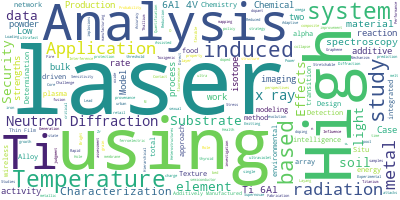

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['TITULO'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.TITULO.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

c:\Users\Admn\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


['application', 'trace', 'element', 'stable', 'isotope', 'signatures', 'determine', 'provenance', 'tea', 'camellia', 'sinensis', 'samples']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [16]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.014*"system" + 0.014*"thyroid" + 0.014*"layang" + 0.008*"laser" + '
  '0.008*"ti" + 0.008*"growth" + 0.008*"based" + 0.008*"maldivensis" + '
  '0.008*"agariciidae" + 0.008*"grain"'),
 (1,
  '0.017*"diffraction" + 0.013*"using" + 0.013*"ti" + 0.012*"neutron" + '
  '0.012*"additively" + 0.012*"manufactured" + 0.012*"high" + 0.009*"fire" + '
  '0.009*"membrane" + 0.009*"chemical"'),
 (2,
  '0.017*"ray" + 0.012*"ti" + 0.012*"thallium" + 0.012*"retail" + 0.012*"nb" + '
  '0.006*"single" + 0.006*"energy" + 0.006*"property" + 0.006*"atomic" + '
  '0.006*"dependence"'),
 (3,
  '0.024*"ti" + 0.015*"zr" + 0.015*"total" + 0.015*"analysis" + '
  '0.010*"ferroelectric" + 0.010*"laser" + 0.010*"quantification" + '
  '0.010*"using" + 0.010*"application" + 0.010*"element"'),
 (4,
  '0.010*"transition" + 0.010*"temperature" + 0.010*"laser" + 0.010*"induced" '
  '+ 0.010*"metal" + 0.010*"radiation" + 0.008*"light" + 0.005*"sports" + '
  '0.005*"thin" + 0.005*"alpha"'),
 (5,
  '0.013*"rate" + 0

In [19]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./USS-DMDB-Taller2'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './USS-DMDB-Taller2'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\Admn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.085031 -0.088676       1        1  14.500895
3     -0.101184  0.053322       2        1  12.777695
4      0.135157  0.030027       3        1  11.757662
8     -0.001045 -0.126588       4        1  11.664608
9      0.099961 -0.010885       5        1  10.805988
7     -0.065077  0.062338       6        1  10.696594
2      0.002048  0.034276       7        1   9.974735
5     -0.013681  0.070940       8        1   7.776935
0      0.008927 -0.018449       9        1   7.018053
6      0.019925 -0.006306      10        1   3.026834, topic_info=            Term      Freq     Total Category  logprob  loglift
160     analysis  6.000000  6.000000  Default  30.0000  30.0000
111        based  3.000000  3.000000  Default  29.0000  29.0000
76           ray  4.000000  4.000000  Default  28.0000  28.0000
117       system  3.000000  3.000000  Default  27.0000  27.0000
308     wireless  2.000000  2.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
51            ti  0.034275  9.743190  Topic10  -6.8464  -2.1523
160     analysis  0.034272  6.197090  Topic10  -6.8465  -1.6998
88   diffraction  0.034270  5.033734  Topic10  -6.8466  -1.4920
273           al  0.034270  3.530867  Topic10  -6.8466  -1.1374
93   temperature  0.034269  4.931641  Topic10  -6.8466  -1.4715

[475 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
12        4  0.428323  activity
12        5  0.428323  activity
80        1  0.406912  additive
80        2  0.406912  additive
80        5  0.406912  additive
...     ...       ...       ...
43        9  0.926694   writing
22        4  0.874415      zinc
325       3  0.851484       zno
140       2  0.649473        zr
140       4  0.324736        zr

[503 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 9, 10, 8, 3, 6, 1, 7])